### Data analysis of Section 6 data.

1. Check all 6 surface maps without thermal compensation
1. Check all 6 surface maps with thermal compensation (due to poor thermal condition, we had to use these for optimization)
1. Make T maps for each surface
2. Plot the RB corrections as a function of iteration.
2. Plot bending force RMS as a function of iteration.
2. Spot check the forces applied at each iteration were applied as intended (Gravity+optimized+bending)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

In [20]:
dateID = '250110'
niter = 6
iter_offset = 0 #started from iter4. first 3 were discarded because data processing tried to compensated +z motion
ntsamples = 100
nBMs = 27
band_width = 15 #in minutes; how long it took for each measurement; 
#we did 2 measurements, each 6 minutes, but there were time in between

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_1/250110 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 10:45:00 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_1/250110 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 10:56:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_2/250110 GMT3 set01 iter2 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 12:19:17 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_2/250110 GMT3 set02 iter2 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 12:36:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_3/250110 GMT3 set01 iter3 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 13:05:11 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_3/250110 GMT3 set02 iter3 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: 

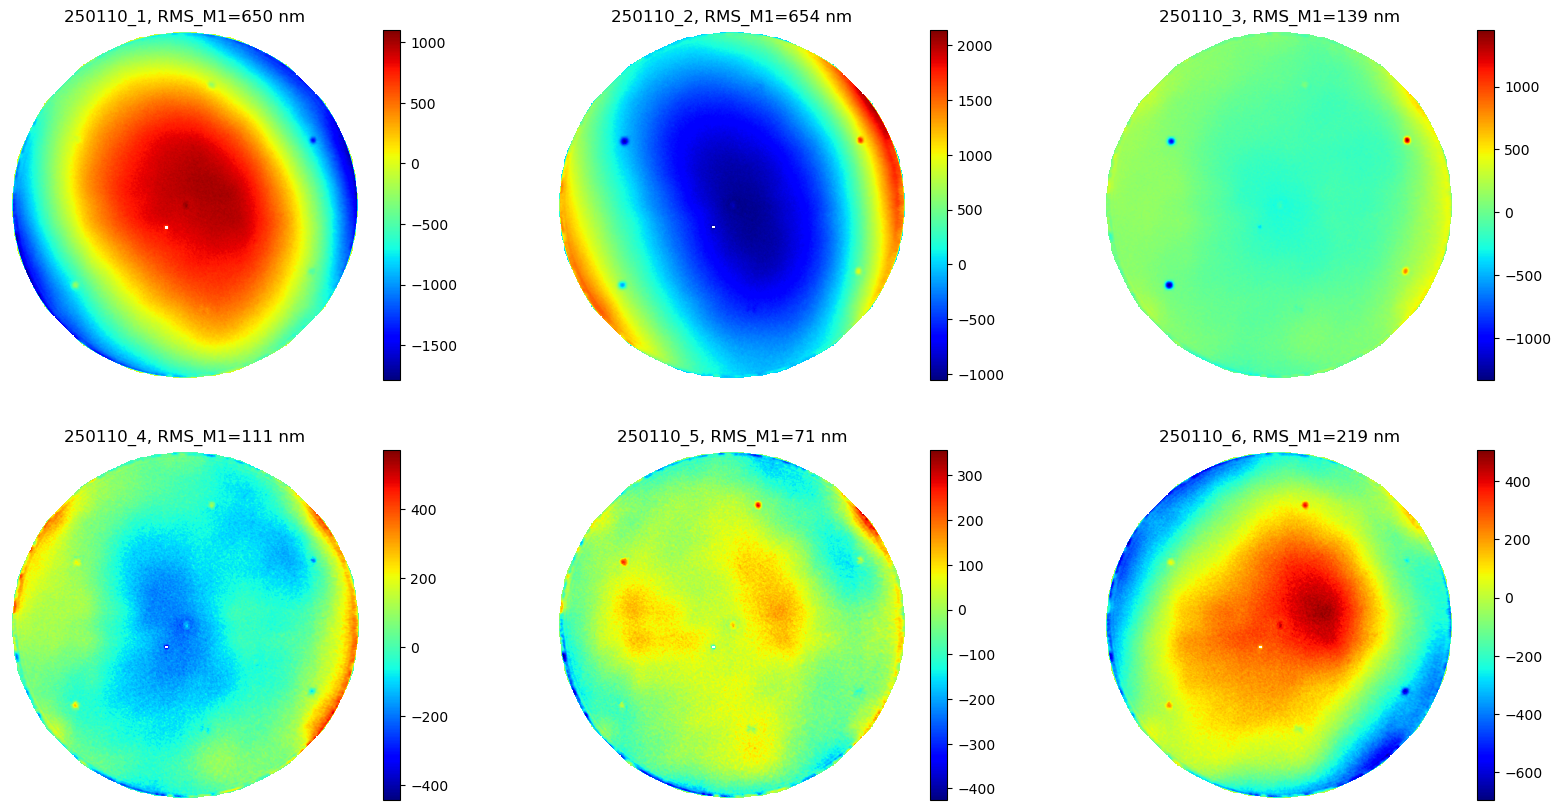

In [10]:
m1s_array = np.zeros((Sxn, Syn, niter))
m1rms_array = np.zeros(niter)

fig, ax = plt.subplots(2,3,figsize=(20,10))
ts_array = []
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/sec 6/%s_%s/%s*set*comp.h5'%(ml_data_dir,dateID, i+1, dateID)))
    assert len(fileset)==2 #for optimization, 2 measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset, apply_mask=False)
    ts_array.append(ts)

    m1s *= 1000 #convert into nm
    m1s_array[:,:, i] = m1s
    
    m1rms_array[i] = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms_array[i]))
    ax[irow][icol].axis('off')

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_1/250110 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 10:45:00 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_1/250110 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 10:56:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_5/250110 GMT3 set01 iter5 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 14:04:57 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_5/250110 GMT3 set02 iter5 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Fri Jan 10 14:14:09 2025 


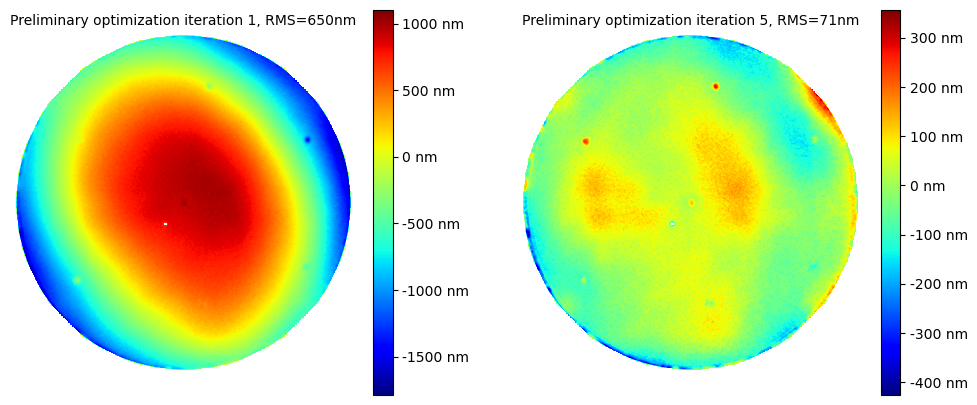

In [8]:
#make a plot for Barbara
fig, ax = plt.subplots(1,2,figsize=(12,5))

i = 0
fileset = sorted(glob.glob('%s/sec 6/%s_%s/%s*set*comp.h5'%(ml_data_dir,dateID, i+1, dateID)))
assert len(fileset)==2 #for optimization, 2 measurements per iteration
m1s,centerRow1,centerCol1,pixelSize1,ts = readH5Map(fileset, apply_mask=False)

img = ax[0].imshow(m1s*1e3, origin='lower')
cbar = fig.colorbar(img, ax=ax[0])
m1rms = np.std(m1s[~np.isnan(m1s)])*1e3
mytitle = 'Preliminary optimization iteration %d, RMS=%.0fnm'%(i+1, m1rms)
ax[0].set_title(mytitle, fontsize=10)
ticks = cbar.get_ticks()[1:-1]
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{tick:.0f} nm" for tick in ticks])
ax[0].axis('off')

i = 4
fileset = sorted(glob.glob('%s/sec 6/%s_%s/%s*set*comp.h5'%(ml_data_dir,dateID, i+1, dateID)))
assert len(fileset)==2 #for optimization, 2 measurements per iteration
m1s,centerRow1,centerCol1,pixelSize1,ts = readH5Map(fileset, apply_mask=False)

img = ax[1].imshow(m1s*1e3, origin='lower')
cbar = fig.colorbar(img, ax=ax[1])
m1rms = np.std(m1s[~np.isnan(m1s)])*1e3
mytitle = 'Preliminary optimization iteration %d, RMS=%.0fnm'%(i+1, m1rms)
ax[1].set_title(mytitle, fontsize=10)
ticks = cbar.get_ticks()[1:-1]
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{tick:.0f} nm" for tick in ticks])
ax[1].axis('off')
plt.savefig("prelim_optimize_71nm.png", dpi=600, bbox_inches='tight')

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_1/250110 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 10:45:00 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_1/250110 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 10:56:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_2/250110 GMT3 set01 iter2 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 12:19:17 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_2/250110 GMT3 set02 iter2 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 12:36:26 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_3/250110 GMT3 set01 iter3 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 13:05:11 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//sec 6/250110_3/250110 GMT3 set02 iter3 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Fri Jan 10 13:14:17 2025 
/Use

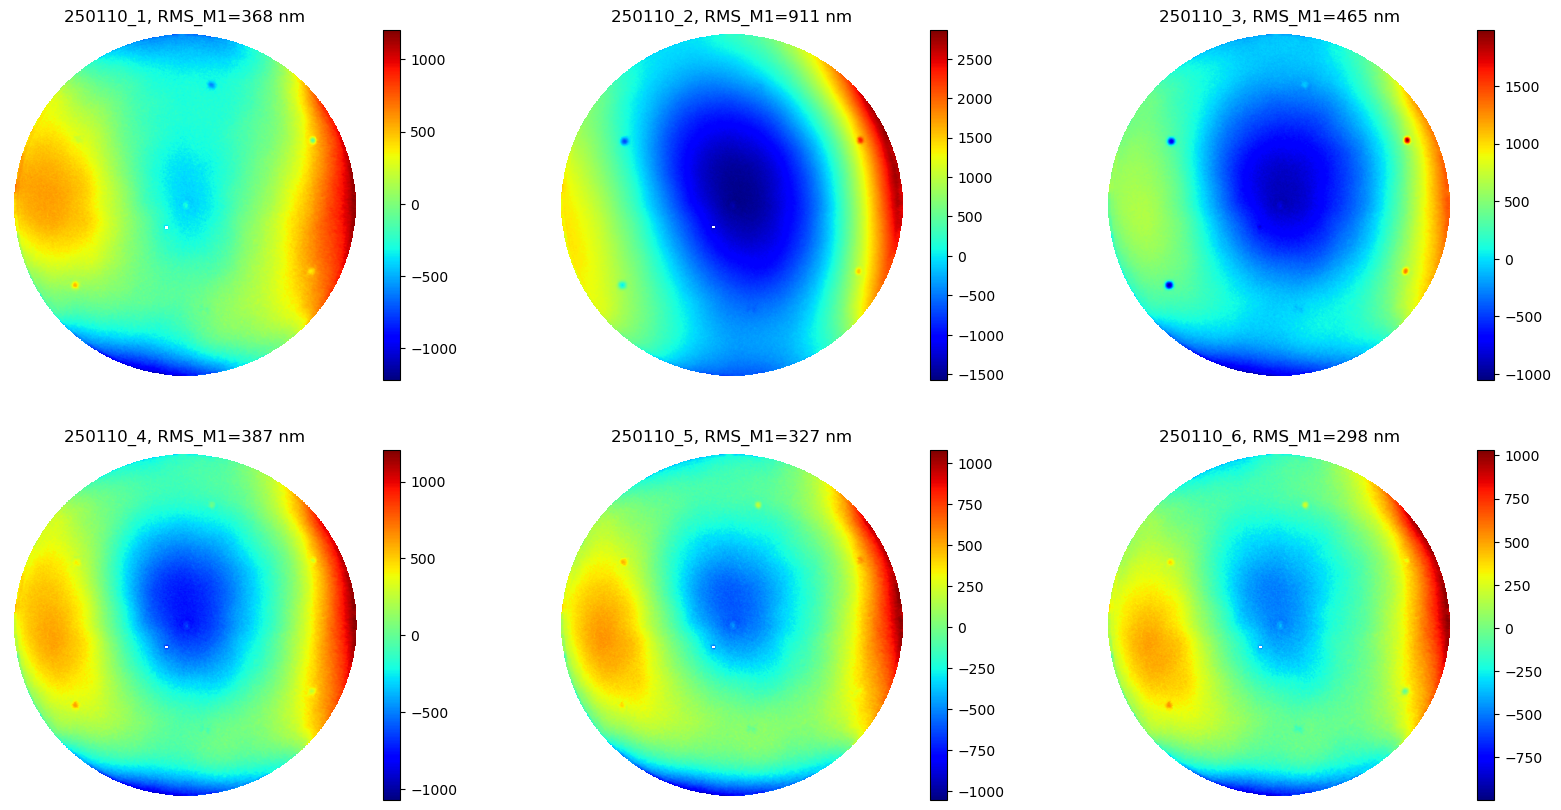

In [11]:
# USE THESE FOR plotoptimization()??
#maps without thermal compensation
#useNoTComp = True
useNoTComp = False  #normally, these should be set to False

fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/sec 6/%s_%s/%s*set*sub.h5'%(ml_data_dir,dateID, i+1, dateID)))
    if len(fileset)>0:
        m1s,centerRow1,centerCol1,pixelSize1,ts = readH5Map(fileset)
        m1s *= 1000 #convert into nm
        m1rms = np.std(m1s[~np.isnan(m1s)])
        if useNoTComp:
            m1s_array[:,:, i] = m1s
            m1rms_array[i] = np.std(m1s[~np.isnan(m1s)])
            
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
        ax[irow][icol].axis('off')

----------------   Fri Jan 10 14:04:57 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 14:04:57  duration =  100  s
(1, 192)
----------------   Fri Jan 10 14:14:09 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 14:14:09  duration =  100  s
(1, 192)
----------------   Fri Jan 10 15:20:38 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 15:20:38  duration =  100  s
(1, 192)
----------------   Fri Jan 10 15:30:47 2025
m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 15:30:47  duration =  100  s
(1, 192)


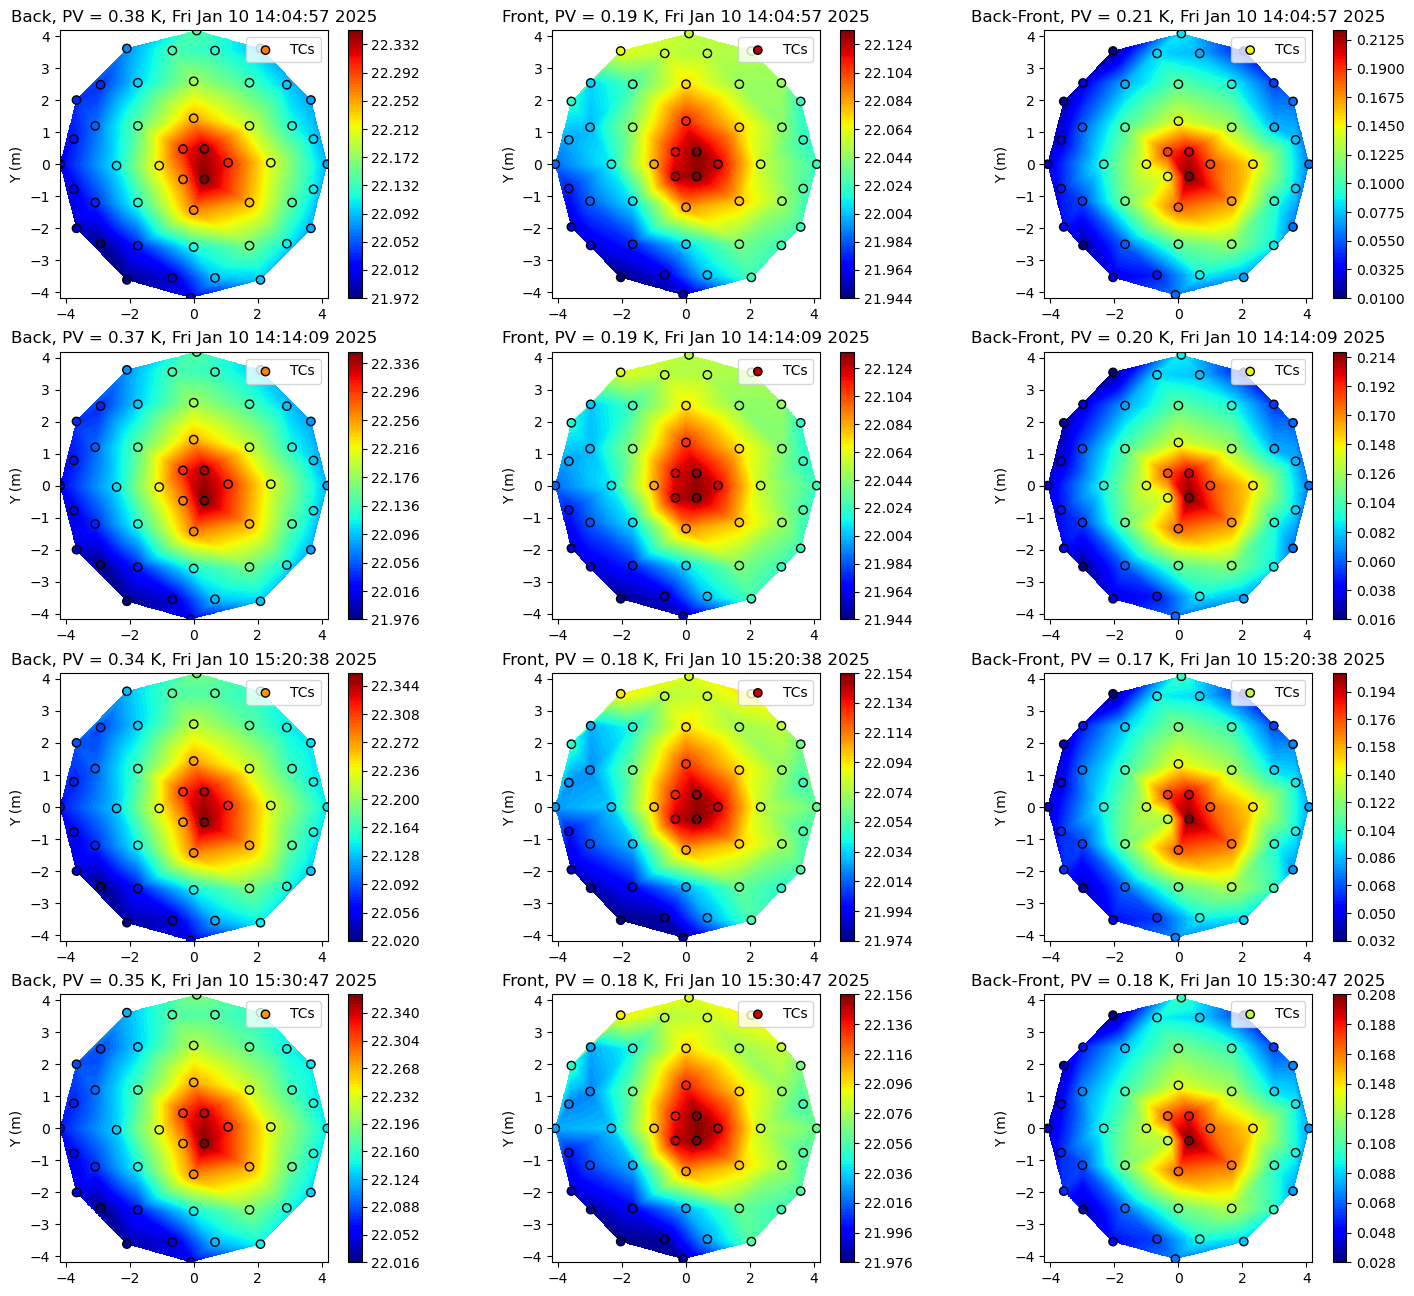

In [12]:
showTMaps(["Fri Jan 10 14:04:57 2025", "Fri Jan 10 14:14:09 2025", 
           "Fri Jan 10 15:20:38 2025", "Fri Jan 10 15:30:47 2025"])

In [13]:
# fit surface map from each iteration to Zernike
#nzer = int(#(6*7)/2+1)
nzer = int((8*9)/2+1) 
zercoeff = np.zeros((niter, nzer))

[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()
for i in range(niter):
    m1s = np.squeeze(m1s_array[:,:,i])
    maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
    nnodesNew = np.sum(maskNew)
    zercoeff[i,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]

In [21]:
## define continuous timestamps
start_time = unix_ts(ts_array[0])-60*16 - 60 #1 minute before starting the first measurement
end_time = unix_ts(ts_array[-1])+60*5 #5 minute after the last measurement
#get continuous mirror positions
mirror_pos_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', 
                                   duration_in_s=end_time-start_time, samples=ntsamples)
#get continuous bending forces
bend_force_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', 
                           duration_in_s=end_time-start_time, samples=ntsamples)
bend_force_z_ntsamples = bend_force_ntsamples[:,:,2]
# convert continuous forces to continuous BM coeffs.
bm_coeff_ntsamples = np.zeros((ntsamples, nBMs))
for i in range(ntsamples):
    bm_coeff_ntsamples[i,:] = VMat[:, :nBMs].transpose() @ gmt170Fvec2gmt165Fvec(bend_force_z_ntsamples[i,:]) \
        / np.sum(VMat[:,:nBMs]**2, axis=0)

m1_s1_support_ctrl/s/mirror_position/value
2025-01-10 10:39:26  duration =  17781  s
(100, 6)
m1_s1_support_ctrl/s/sa_bending_force/value
2025-01-10 10:39:26  duration =  17781  s
(100, 170, 3)


In [22]:
# get TC data
tc, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/tc_temperature/value', 
                   duration_in_s=end_time-start_time, samples=ntsamples)
tambient, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/ambient_temperature/value', 
                         duration_in_s=end_time-start_time, samples=ntsamples)
idxfo = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) > 4
idxfi = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) < 1
idxbo = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) > 4
idxbi = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) < 1

m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-10 10:39:26  duration =  17781  s
(100, 192)
m1_s1_thermal_ctrl/i/ambient_temperature/value
2025-01-10 10:39:26  duration =  17781  s
(100,)


In [23]:
ts_array

['Fri Jan 10 10:56:26 2025',
 'Fri Jan 10 12:36:26 2025',
 'Fri Jan 10 13:14:17 2025',
 'Fri Jan 10 13:42:55 2025',
 'Fri Jan 10 14:14:09 2025',
 'Fri Jan 10 15:30:47 2025']

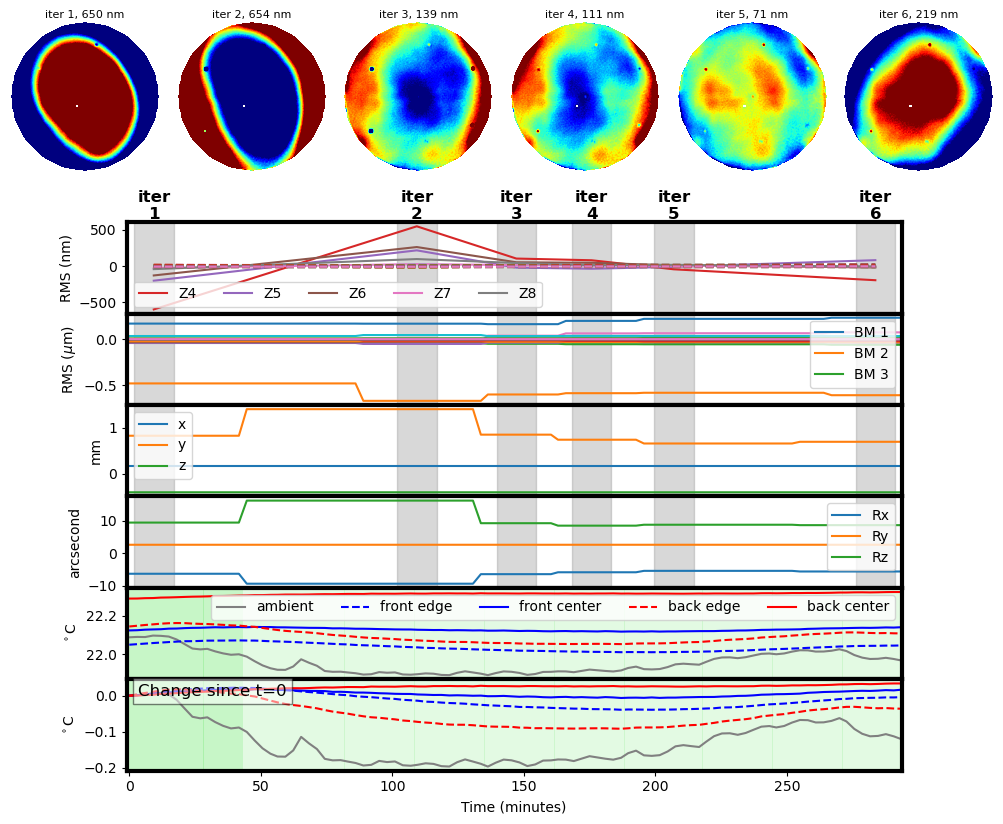

In [24]:
plotOptimization1(m1s_array, m1rms_array, ts_array, zercoeff, ntsamples, bm_coeff_ntsamples, tt, 
                  mirror_pos_ntsamples, tambient, 
                  tc, band_width)

In [ ]:
zercoeff[:,3]